<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body, 
div, 
h1, 
h2, 
h3, 
h4, 
h5, 
h6, 
p, 
span, 
label, 
input, 
textarea, 
button, 
pre, 
code, 
kbd, 
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
<div align="center">
    <h1>Customer Invoices Cohort Retention Analysis</h1>
</div>

**TEAM**
- Zia Tabaruk
- Faizal Lutfi Yoga Triadi
- Dzaky Muhammad Baihaqi

<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body, 
div, 
h1, 
h2, 
h3, 
h4, 
h5, 
h6, 
p, 
span, 
label, 
input, 
textarea, 
button, 
pre, 
code, 
kbd, 
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
# Business Understanding

**Latar Belakang:**

Pengelolaan pembayaran invoice merupakan bagian penting dari operasional keuangan perusahaan. Dalam bisnis, pemahaman tentang pola pembayaran pelanggan sangat penting untuk memastikan kelancaran operasi dan kesehatan keuangan perusahaan. Analisis retensi cohort adalah salah satu cara untuk memahami perilaku pelanggan dari waktu ke waktu, sehingga perusahaan dapat mengidentifikasi tren, mengoptimalkan strategi penagihan, dan meningkatkan retensi pelanggan.


**Stakeholder:**

**Tim Eksekutif Bisnis:** Tim ini bertanggung jawab untuk pengambilan keputusan strategis dalam perusahaan. Mereka memerlukan informasi mengenai perilaku pelanggan untuk mengidentifikasi segmen pelanggan yang setia dan memahami faktor-faktor yang mempengaruhi retensi pelanggan. Dengan wawasan dari analisis cohort, tim ini dapat menentukan strategi pemasaran yang tepat, kebijakan penagihan yang efektif, dan inisiatif loyalitas untuk meningkatkan retensi pelanggan dan memaksimalkan pendapatan.


**Permasalahan:**

Perusahaan kesulitan untuk memahami pola pembayaran pelanggan dari waktu ke waktu. Ketidakpastian dalam retensi pelanggan ini dapat mempengaruhi perencanaan keuangan dan operasional perusahaan, serta menghambat pengambilan keputusan strategis terkait pengelolaan hubungan pelanggan.


**Tujuan:**

Tujuan perusahaan adalah untuk menganalisis tingkat retensi cohort pelanggan dan mengidentifikasi pola retensi dari waktu ke waktu. Dengan analisis ini, perusahaan dapat:

1. Memahami tingkat retensi pelanggan pada setiap cohort bulan ke bulan.
2. Mengembangkan strategi yang lebih efektif untuk mempertahankan pelanggan berdasarkan wawasan dari analisis retensi ini.

<hr>

**Data Analysis:**

Analisis retensi cohort dilakukan dengan beberapa langkah berikut:

1. **Pembuatan Cohort:** Mengelompokkan pelanggan berdasarkan bulan pertama mereka melakukan transaksi. Contoh: semua pelanggan yang pertama kali melakukan transaksi pada Januari 2020 dimasukkan ke dalam cohort Januari 2020.
2. **Analisis Retensi:** Menghitung jumlah pelanggan dari setiap cohort yang melakukan transaksi pada bulan-bulan berikutnya. Misalnya, berapa banyak pelanggan cohort Januari 2020 yang melakukan pembayaran kembali pada Februari 2020, Maret 2020, dan seterusnya.
3. **Visualisasi dengan Heatmap:** Membuat pivot table untuk visualisasi retensi cohort dalam bentuk heatmap. Ini akan menunjukkan proporsi pelanggan yang tetap aktif dari setiap cohort pada bulan-bulan berikutnya.
4. **Analisis Tren:** Menganalisis tren retensi dari waktu ke waktu dan mengidentifikasi pola atau anomali. Misalnya, melihat apakah ada penurunan signifikan pada retensi setelah beberapa bulan, atau apakah ada pola retensi yang konsisten di beberapa cohort.

<hr>

In [1]:
# Import libary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 500)

from matplotlib import rcParams
rcParams['font.family'] = 'Poppins' 

import warnings
warnings.filterwarnings('ignore')

<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body, 
div, 
h1, 
h2, 
h3, 
h4, 
h5, 
h6, 
p, 
span, 
label, 
input, 
textarea, 
button, 
pre, 
code, 
kbd, 
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
# Data Understanding

| *Kolom*                  | *Deskripsi*                                                                                               | *Tipe Data*   | *Contoh Nilai*        |
|----------------------------|-------------------------------------------------------------------------------------------------------------|-----------------|-------------------------|
| business_code             | Kode bisnis yang mengidentifikasi entitas bisnis.                                                           | String          | U001, CA02               |
| cust_number               | Nomor pelanggan yang mengidentifikasi pelanggan unik.                                                       | String          | 0200769623, 0200980828   |
| name_customer             | Nama pelanggan yang terkait dengan transaksi atau invoice.                                                  | String          | WAL-MAR corp, BEN E      |
| clear_date                | Tanggal di mana invoice diselesaikan atau dibayarkan.                                                       | Date            | 2020-02-11, 2019-08-08   |
| buisness_year             | Tahun bisnis saat invoice dibuat.                                                                           | Float           | 2020.0, 2019.0           |
| doc_id                    | Nomor dokumen unik yang mengidentifikasi invoice atau transaksi.                                            | Float           | 1.930438e+09, 2.960581e+09|
| posting_date              | Tanggal ketika transaksi di-posting dalam sistem keuangan.                                                  | Date            | 2020-01-26, 2019-07-22   |
| document_create_date      | Tanggal ketika dokumen invoice dibuat.                                                                      | Integer         | 20200125, 20190914       |
| document_create_date.1    | Tanggal kedua yang mencerminkan proses pembuatan dokumen (mungkin versi atau revisi).                        | Integer         | 20200126, 20190914       |
| due_in_date               | Tanggal jatuh tempo untuk pembayaran invoice.                                                               | Float           | 20200210.0, 20190811.0   |
| invoice_currency          | Mata uang yang digunakan untuk transaksi.                                                                   | String          | USD, CAD                 |
| document type             | Tipe dokumen terkait transaksi, biasanya menunjukkan jenis transaksi (contoh: RV).                          | String          | RV                       |
| posting_id                | ID posting yang menghubungkan transaksi dalam sistem keuangan.                                              | Float           | 1.0                      |
| total_open_amount         | Jumlah total yang dibuka pada invoice sebelum dibayar.                                                      | Float           | 54273.28, 79656.60       |
| baseline_create_date      | Tanggal dasar pembuatan transaksi yang menjadi acuan.                                                       | Float           | 20200126.0, 20190722.0   |
| cust_payment_terms        | Syarat pembayaran yang disepakati dengan pelanggan.                                                         | String          | NAH4, NAD1, CA10         |

<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body, 
div, 
h1, 
h2, 
h3, 
h4, 
h5, 
h6, 
p, 
span, 
label, 
input, 
textarea, 
button, 
pre, 
code, 
kbd, 
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>


# Analisis Cohort: Persiapan Data

Untuk visualisasi data yang tepat untuk analisis retensi per kelompok cohort, kita harus membuat fitur baru seperti berikut :

1. **cohort_month**: Bulan aktivitas pertama pelanggan melakukan pelunasan transaksi (waktu pelunasan transaksi pertama)
2. **current_month**: Bulan observasi (bulan transaksi dalam data)
3. **count_user**: Jumlah pelanggan berdasarkan cohort_month dan period_distance
4. **period_distance**: Jarak antara cohort_month dengan current_month

In [2]:
retention = pd.read_csv('dataset.csv',
                        parse_dates=['clear_date'])

display(retention.head(5), retention.info())
# drop useless column
retention.drop(['area_business', 'invoice_id', 'isOpen'], axis=1, inplace=True)

# drop na
retention.dropna(inplace=True)
retention.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              40000 non-null  datetime64[ns]
 4   buisness_year           50000 non-null  float64       
 5   doc_id                  50000 non-null  float64       
 6   posting_date            50000 non-null  object        
 7   document_create_date    50000 non-null  int64         
 8   document_create_date.1  50000 non-null  int64         
 9   due_in_date             50000 non-null  float64       
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              50000 non-null  float6

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


None

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
dtype: int64

In [3]:
retention['cust_number'].value_counts()

cust_number
0200769623    8942
0200726979    1519
0200762301    1171
0200759878    1075
0200794332     901
              ... 
200306844        1
200775660        1
0140105192       1
0200389625       1
0200541916       1
Name: count, Length: 1344, dtype: int64

In [4]:
retention.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,54273.28,20200126.0,NAH4
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,79656.60,20190722.0,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,2253.86,20190914.0,NAA8
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,33133.29,20191113.0,NAH4
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,20190920,20190920,20191004.0,CAD,RV,1.0,22225.84,20190924.0,CA10


<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body, 
div, 
h1, 
h2, 
h3, 
h4, 
h5, 
h6, 
p, 
span, 
label, 
input, 
textarea, 
button, 
pre, 
code, 
kbd, 
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>

# Membuat Tabel Cohort

Kita membuat tabel cohort dengan mempivot data sehingga kita bisa menganalisis retensi pelanggan dari waktu ke waktu.


In [5]:
# step 1
# define cohort month
retention['cohort_month'] = retention.groupby('cust_number')['clear_date'].transform('min').dt.to_period('M')
retention.sample(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,cohort_month
11129,U001,200750051,ALBER co,2019-06-04,2019.0,1.929353e+09,2019-05-20,20190521,20190520,20190604.0,USD,RV,1.0,20976.53,20190520.0,NAA8,2019-06
6653,U001,0200782001,GORDO associates,2019-04-30,2019.0,1.929147e+09,2019-04-15,20190415,20190415,20190430.0,USD,RV,1.0,35081.78,20190415.0,NAA8,2019-01
31156,U001,0200705742,DOT trust,2020-03-12,2020.0,1.930555e+09,2020-02-21,20200221,20200221,20200326.0,USD,RV,1.0,2533.00,20200221.0,NAAW,2019-01
39564,U001,0200705742,DOT systems,2019-10-15,2019.0,1.929861e+09,2019-09-10,20190910,20190910,20191012.0,USD,RV,1.0,18093.52,20190910.0,NA32,2019-01
45314,U001,0200729942,SA llc,2019-12-17,2019.0,1.930210e+09,2019-12-02,20191202,20191202,20191217.0,USD,RV,1.0,6852.68,20191202.0,NAA8,2019-01
46055,U001,0200704045,RA in,2019-02-25,2019.0,1.928775e+09,2019-02-10,20190209,20190210,20190225.0,USD,RV,1.0,56267.86,20190210.0,NAA8,2019-01
14968,U001,CCU002,KRFT FDS llc,2020-03-27,2020.0,1.930516e+09,2020-02-15,20200211,20200215,20200321.0,USD,RV,1.0,538.55,20200215.0,NAG2,2019-03
49870,U001,200744019,TARG corp,2019-04-09,2019.0,1.929013e+09,2019-03-24,20190322,20190324,20190408.0,USD,RV,1.0,9346.86,20190324.0,NAA8,2019-02
43475,U001,0200416837,DEC associates,2019-11-08,2019.0,1.930099e+09,2019-11-05,20191105,20191105,20191111.0,USD,RV,1.0,17791.16,20191101.0,NAM2,2019-01
10616,U001,0200744019,TARG corporation,2019-03-26,2019.0,1.928888e+09,2019-03-03,20190302,20190303,20190318.0,USD,RV,1.0,5352.55,20190303.0,NAA8,2019-01


In [6]:
# step 2
# define current_transaction_month
retention['current_transaction_month'] = retention['clear_date'].dt.to_period('M')
retention = retention[['cust_number', 'cohort_month', 'current_transaction_month']]
retention.drop_duplicates(inplace=True)
retention.head(10)

,cust_number,cohort_month,current_transaction_month
0,0200769623,2019-01,2020-02
1,0200980828,2019-01,2019-08
2,0200792734,2019-01,2019-12
4,0200769623,2019-01,2019-11
5,0140106181,2019-02,2019-12
8,0200769623,2019-01,2019-06
9,0200762301,2019-01,2019-03
11,0200743129,2019-01,2019-01
12,0200186937,2019-01,2019-05
13,0200721222,2019-01,2019-11


In [7]:
# step 3
# agregasi
cohort_retention = retention.groupby(['cohort_month', 'current_transaction_month'])['cust_number'].count().reset_index().rename(columns={'cust_number': 'count_user'})
cohort_retention.head(10)

,cohort_month,current_transaction_month,count_user
0,2019-01,2019-01,232
1,2019-01,2019-02,167
2,2019-01,2019-03,179
3,2019-01,2019-04,174
4,2019-01,2019-05,183
5,2019-01,2019-06,173
6,2019-01,2019-07,170
7,2019-01,2019-08,172
8,2019-01,2019-09,175
9,2019-01,2019-10,181


In [8]:
# step 4
from operator import attrgetter

# define period_distance (month distance)
cohort_retention['period_distance'] = (cohort_retention['current_transaction_month'] - cohort_retention['cohort_month']).apply(attrgetter('n'))
cohort_retention.head(10)

,cohort_month,current_transaction_month,count_user,period_distance
0,2019-01,2019-01,232,0
1,2019-01,2019-02,167,1
2,2019-01,2019-03,179,2
3,2019-01,2019-04,174,3
4,2019-01,2019-05,183,4
5,2019-01,2019-06,173,5
6,2019-01,2019-07,170,6
7,2019-01,2019-08,172,7
8,2019-01,2019-09,175,8
9,2019-01,2019-10,181,9


In [9]:
# step 5
# pivot
cohort_retention_pivot = cohort_retention.pivot_table(index='cohort_month', columns='period_distance', values='count_user')
cohort_retention_pivot

period_distance,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
cohort_month,,,,,,,,,,,,,,,,,
2019-01,232.0,167.0,179.0,174.0,183.0,173.0,170.0,172.0,175.0,181.0,175.0,168.0,144.0,166.0,137.0,31.0,5.0
2019-02,247.0,90.0,120.0,101.0,98.0,100.0,96.0,73.0,78.0,83.0,87.0,44.0,67.0,55.0,10.0,4.0,NaN
2019-03,185.0,73.0,60.0,60.0,64.0,54.0,43.0,37.0,40.0,39.0,17.0,30.0,18.0,8.0,1.0,NaN,NaN
2019-04,178.0,32.0,36.0,42.0,30.0,22.0,17.0,18.0,17.0,14.0,16.0,17.0,6.0,1.0,NaN,NaN,NaN
2019-05,89.0,10.0,23.0,20.0,10.0,18.0,13.0,12.0,4.0,9.0,7.0,2.0,1.0,NaN,NaN,NaN,NaN
2019-06,66.0,15.0,15.0,11.0,7.0,8.0,13.0,4.0,7.0,3.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN
2019-07,100.0,8.0,4.0,9.0,5.0,8.0,3.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,53.0,6.0,4.0,8.0,5.0,2.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,34.0,5.0,9.0,2.0,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# step 6
# convert to percentage
cohort_retention_final = cohort_retention_pivot.divide(cohort_retention_pivot.iloc[:, 0], axis=0)
cohort_retention_final.iloc[6, 10] = 0
cohort_retention_final.iloc[6, 9] = 0
cohort_retention_final.iloc[7, 9] = 0
cohort_retention_final.iloc[8, 8] = 0
cohort_retention_final.iloc[8, 7] = 0
cohort_retention_final.iloc[9, 7] = 0
cohort_retention_final.iloc[10, 5] = 0
cohort_retention_final.iloc[10, 6] = 0
cohort_retention_final.iloc[11, 4] = 0
cohort_retention_final.iloc[11, 5] = 0
cohort_retention_final.iloc[12, 2] = 0
cohort_retention_final.iloc[12, 3] = 0
cohort_retention_final.iloc[12, 4] = 0
cohort_retention_final.iloc[13, 3] = 0
cohort_retention_final.iloc[13, 2] = 0
cohort_retention_final.iloc[14, 2] = 0
cohort_retention_final.iloc[14, 1] = 0
cohort_retention_final.iloc[15, 1] = 0


cohort_retention_final

period_distance,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
cohort_month,,,,,,,,,,,,,,,,,
2019-01,1.0,0.719828,0.771552,0.750000,0.788793,0.745690,0.732759,0.741379,0.754310,0.780172,0.754310,0.724138,0.620690,0.715517,0.590517,0.133621,0.021552
2019-02,1.0,0.364372,0.485830,0.408907,0.396761,0.404858,0.388664,0.295547,0.315789,0.336032,0.352227,0.178138,0.271255,0.222672,0.040486,0.016194,NaN
2019-03,1.0,0.394595,0.324324,0.324324,0.345946,0.291892,0.232432,0.200000,0.216216,0.210811,0.091892,0.162162,0.097297,0.043243,0.005405,NaN,NaN
2019-04,1.0,0.179775,0.202247,0.235955,0.168539,0.123596,0.095506,0.101124,0.095506,0.078652,0.089888,0.095506,0.033708,0.005618,NaN,NaN,NaN
2019-05,1.0,0.112360,0.258427,0.224719,0.112360,0.202247,0.146067,0.134831,0.044944,0.101124,0.078652,0.022472,0.011236,NaN,NaN,NaN,NaN
2019-06,1.0,0.227273,0.227273,0.166667,0.106061,0.121212,0.196970,0.060606,0.106061,0.045455,0.045455,0.015152,NaN,NaN,NaN,NaN,NaN
2019-07,1.0,0.080000,0.040000,0.090000,0.050000,0.080000,0.030000,0.030000,0.040000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,1.0,0.113208,0.075472,0.150943,0.094340,0.037736,0.056604,0.018868,0.018868,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,1.0,0.147059,0.264706,0.058824,0.117647,0.029412,0.029412,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body, 
div, 
h1, 
h2, 
h3, 
h4, 
h5, 
h6, 
p, 
span, 
label, 
input, 
textarea, 
button, 
pre, 
code, 
kbd, 
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>

# Visualisasi Retensi dengan Heatmap

Heatmap retensi memberikan representasi visual tentang bagaimana tingkat retensi berubah dari waktu ke waktu untuk berbagai cohort. Ini membantu mengidentifikasi tren dan pola dalam perilaku pelanggan.

## Cara Membaca Heatmap:
- Sumbu Y menunjukkan cohort berdasarkan bulan pertama pelanggan melakukan transaksi.
- Sumbu X menunjukkan jumlah bulan sejak pembelian pertama.
- Warna pada heatmap menunjukkan tingkat retensi, dengan warna yang lebih gelap menunjukkan retensi yang lebih tinggi.


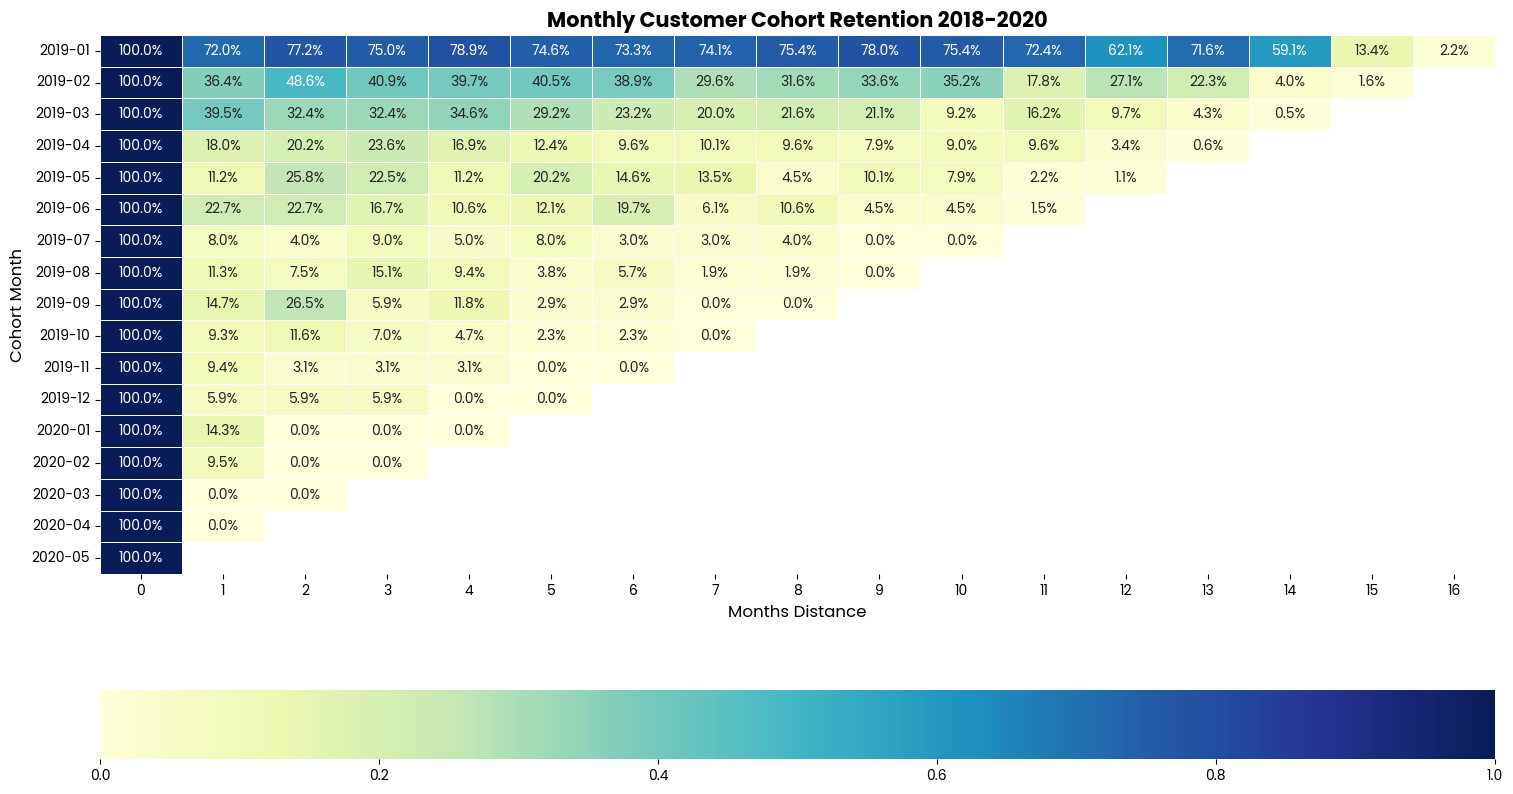

In [11]:
# create heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(cohort_retention_final, cmap='YlGnBu', annot=True, fmt='.1%', cbar_kws={'orientation': 'horizontal'}, linewidths=0.5, linecolor='white', vmin=0, vmax=1)
plt.title('Monthly Customer Cohort Retention 2018-2020', fontsize=15, fontweight='bold')
plt.xlabel('Months Distance', fontsize=12)
plt.ylabel('Cohort Month', fontsize=12)
plt.show()

In [12]:
# step 1 alternatively
lineplot1 = cohort_retention_final.reset_index().melt(id_vars='cohort_month', value_name='percentage', var_name='period_distance')
lineplot1.sample(10)

,cohort_month,period_distance,percentage
222,2019-02,13,0.222672
194,2019-08,11,NaN
262,2019-08,15,NaN
234,2020-02,13,NaN
38,2019-05,2,0.258427
113,2019-12,6,NaN
146,2019-11,8,NaN
139,2019-04,8,0.095506
191,2019-05,11,0.022472
199,2020-01,11,NaN


<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body, 
div, 
h1, 
h2, 
h3, 
h4, 
h5, 
h6, 
p, 
span, 
label, 
input, 
textarea, 
button, 
pre, 
code, 
kbd, 
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>

# Visualisasi Retensi rate dengan Line Plot

Line plot menunjukkan tren retensi dari waktu ke waktu untuk berbagai cohort, membuatnya mudah untuk membandingkan kinerja retensi dari cohort yang berbeda.

## Cara Membaca Line Plot:
- Sumbu X menunjukkan jumlah bulan sejak pembelian pertama.
- Sumbu Y menunjukkan tingkat retensi dalam persentase.
- Setiap garis mewakili cohort yang berbeda, memungkinkan kita untuk melihat dan membandingkan tren retensi dari waktu ke waktu.


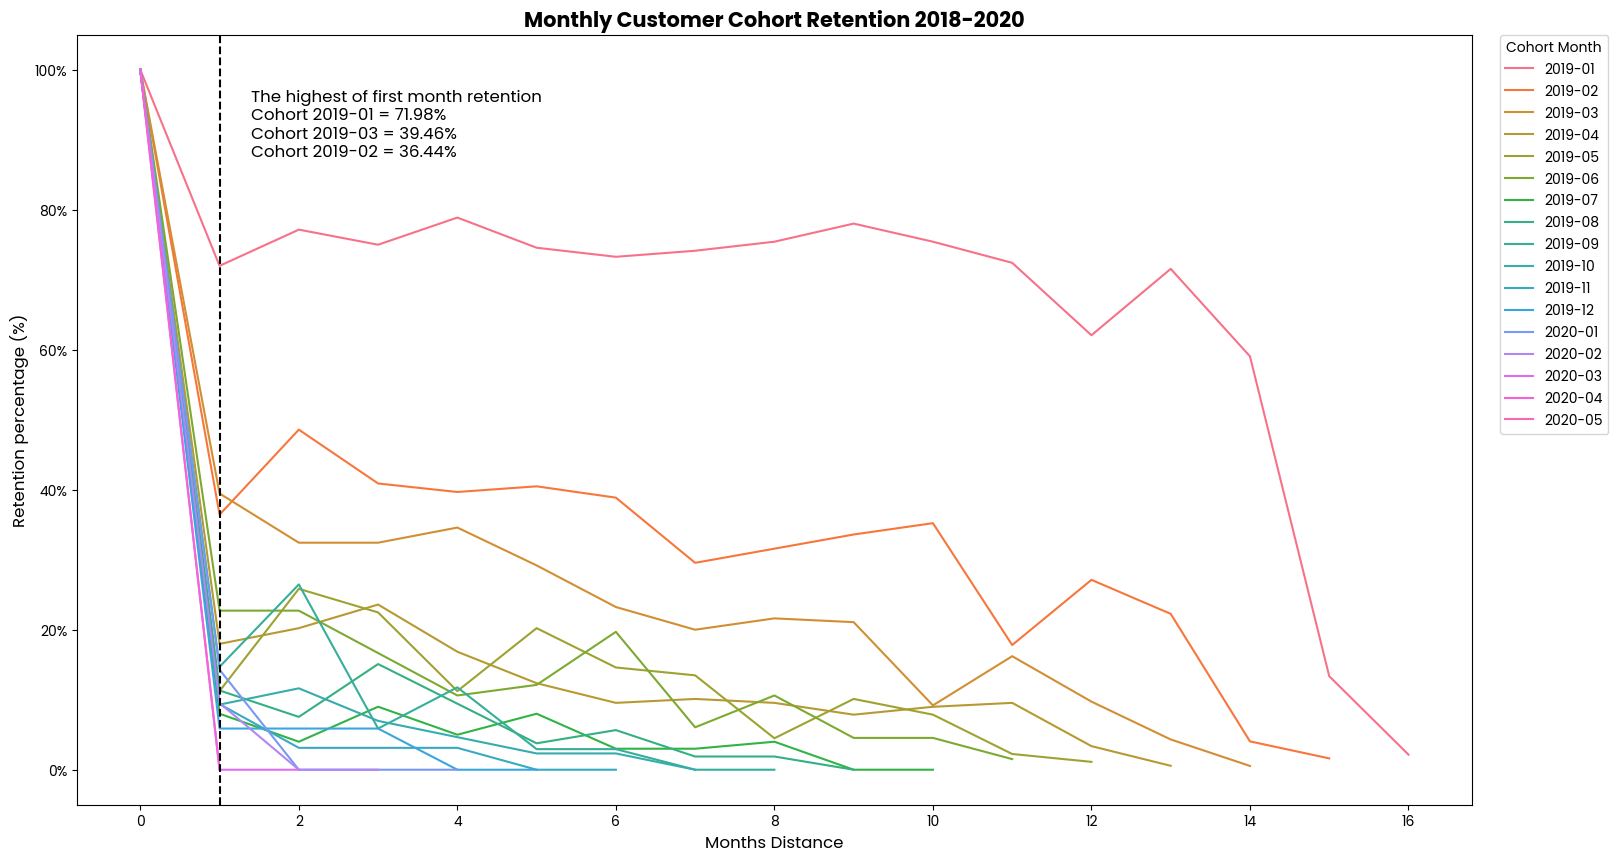

In [13]:
import matplotlib.ticker as mticker
# Creating the plot again after ensuring no duplicates
plt.figure(figsize=(18, 10))
sns.lineplot(data=lineplot1, x='period_distance', y='percentage', hue='cohort_month')
plt.title('Monthly Customer Cohort Retention 2018-2020', fontsize=15, fontweight='bold')

# Vertical line
plt.axvline(x=1, color='black', linestyle='--')

# Annotations
top_3 = lineplot1[lineplot1['period_distance'] == 1].sort_values(by='percentage', ascending=False).head(3)
top_3_name = top_3['cohort_month'].to_list()
top_3_percentage = top_3['percentage'].to_list()

# String annotation with dynamic handling for missing data
annotation_text = "The highest of first month retention\n"
for i in range(len(top_3_name)):
    annotation_text += f"Cohort {top_3_name[i]} = {top_3_percentage[i]:.2%}\n"

plt.text(1.4, 0.85, annotation_text, fontsize=12)

# Customizing axes labels
plt.xlabel('Months Distance', fontsize=12)
plt.ylabel('Retention percentage (%)', fontsize=12)
plt.legend(title='Cohort Month', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)  # Adding title to legend
# Setting y-ticks as percentage
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

# Showing the plot
plt.show()


<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body, 
div, 
h1, 
h2, 
h3, 
h4, 
h5, 
h6, 
p, 
span, 
label, 
input, 
textarea, 
button, 
pre, 
code, 
kbd, 
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>

## Insight
1. **Cohort dengan Retensi Tinggi:** Cohort Januari 2019 dan Maret 2019 menunjukkan strategi pemasaran yang berhasil dengan retensi tinggi. Optimalisasi kampanye serupa untuk cohort ini dapat dipertimbangkan untuk mempertahankan retensi.

2. **Cohort dengan Retensi Rendah:** Cohort April 2019 dan Oktober 2019 mengalami penurunan signifikan dalam retensi. Perlu evaluasi lebih lanjut terhadap strategi dan produk yang digunakan pada periode tersebut. Identifikasi area yang memerlukan perbaikan untuk meningkatkan retensi di cohort ini.

# **Kesimpulan dari Analisis Retensi Cohort (2019-2020)**

1. **Cohort Januari 2019 (Cohort 2019-01)**:  
   - Cohort ini menunjukkan performa retensi tertinggi, dengan **72% retensi pada bulan pertama**. Pada bulan ke-10, angka ini masih bertahan di **59.1%**, menjadikannya cohort dengan retensi terbaik. Kesuksesan ini dapat disebabkan oleh strategi pemasaran yang sangat efektif pada awal tahun 2019, mungkin melalui peluncuran promosi besar atau produk yang sangat diminati.

2. **Cohort Februari 2019 (Cohort 2019-02)**:  
   - Cohort ini menunjukkan penurunan yang signifikan, dengan hanya **36.44% retensi pada bulan pertama** dan **35.2% pada bulan kedua**. Penurunan ini lebih drastis dibandingkan Januari 2019, menunjukkan adanya kemungkinan perubahan strategi pemasaran atau penurunan efektivitas layanan yang mempengaruhi ketertarikan pelanggan pada produk di bulan ini.

3. **Cohort Maret 2019 (Cohort 2019-03)**:  
   - Cohort ini memulai dengan **39.5% retensi di bulan pertama** tetapi mengalami penurunan yang stabil, dengan **9.2% retensi di bulan ke-10**. Ini menunjukkan adanya kehilangan pelanggan yang lebih cepat dibanding cohort Januari, yang bisa dikaitkan dengan perubahan pola permintaan atau penurunan kualitas pengalaman pelanggan.

4. **Cohort dengan Penurunan Drastis (2019-04 hingga 2020-04)**:  
   - Cohort ini secara konsisten menunjukkan retensi yang rendah setelah bulan kedua, dengan beberapa cohort bahkan mencapai **0% retensi** pada bulan ke-3 dan ke-4. Misalnya, **Cohort April 2019 (Cohort 2019-04)** hanya mempertahankan **9.0% pelanggan di bulan ke-5**. Kemungkinan besar, faktor seperti perubahan musiman dalam permintaan atau promosi yang kurang menarik mempengaruhi cohort-cohort ini.

---

# **Rekomendasi**

1. **Pelajari Keberhasilan Cohort Januari 2019:**
   - Cohort Januari 2019 memiliki tingkat retensi yang sangat tinggi. Penting untuk melakukan analisis mendalam terhadap elemen-elemen spesifik yang membuat cohort ini berhasil, seperti promosi, kampanye, atau produk yang ditawarkan pada periode tersebut. Data ini bisa membantu untuk mereplikasi kesuksesan ini di cohort-cohort berikutnya.

2. **Evaluasi Cohort Februari dan Maret 2019:**
   - Retensi menurun signifikan pada cohort Februari dan Maret 2019. Perusahaan perlu menganalisis apakah ada perubahan dalam strategi pemasaran atau produk pada periode tersebut yang mungkin mengakibatkan penurunan retensi. Analisis lebih lanjut dapat membantu memperbaiki kelemahan dalam strategi pemasaran.

3. **Perbaikan Strategi untuk Cohort dengan Penurunan Cepat (2019-04 hingga 2020-04):**
   - Cohort ini menunjukkan penurunan yang sangat cepat. Perusahaan harus mengidentifikasi penyebab utama dari penurunan ini, seperti kurangnya follow-up setelah pembelian pertama, atau tidak adanya penawaran yang menarik di bulan-bulan berikutnya. Mengimplementasikan program loyalitas atau penawaran diskon yang lebih relevan dapat membantu memperpanjang retensi pelanggan di cohort-cohort ini.

4. **Pemantauan dan Penyesuaian Berkelanjutan:**
   - Retensi pelanggan adalah metrik yang dinamis dan memerlukan pemantauan serta penyesuaian terus-menerus. Dengan pemantauan berkelanjutan dan penyesuaian strategi berdasarkan data terbaru, perusahaan dapat terus meningkatkan loyalitas pelanggan dan profitabilitas jangka panjang.

---

Dengan analisis mendalam dan rekomendasi yang spesifik, perusahaan dapat memahami faktor-faktor yang menyebabkan penurunan atau peningkatan retensi di berbagai cohort. Dengan menggunakan data ini, perusahaan dapat menyesuaikan strategi pemasaran dan retensi yang lebih efektif, serta menerapkan pelajaran dari cohort sukses untuk meningkatkan kinerja cohort-cohort lainnya.

In [14]:
cohort_retention_final.to_csv('cohort_retention_pivot.csv')
lineplot1.to_csv('lineplot_percent.csv', index=False)

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Thank You</title>
    <link href="https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;600&display=swap" rel="stylesheet">
    <style>
        body {
            font-family: 'Poppins', sans-serif;
            background-color: #f7f7f7;
            margin: 0;
            padding: 0;
        }
        .container {
            max-width: 800px;
            margin: 50px auto;
            background-color: #ffffff;
            padding: 30px;
            border-radius: 15px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            text-align: center;
        }
        h1 {
            font-size: 2.5em;
            color: #333333;
            margin-bottom: 10px;
        }
        h2 {
            font-size: 1.8em;
            color: #555555;
            margin-bottom: 30px;
        }
        p {
            font-size: 1.1em;
            color: #666666;
            margin-bottom: 20px;
            line-height: 1.6;
        }
        .quote {
            font-size: 1em;
            font-style: italic;
            color: #888888;
            border-left: 4px solid #4CAF50;
            padding-left: 20px;
            margin: 30px 0;
            text-align: left;
        }
        .footer {
            font-size: 0.9em;
            color: #777777;
            margin-top: 30px;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>🌟 Terima Kasih! 🌟</h1>
        <p>
            Terima kasih atas perhatian dan waktu yang telah Anda berikan untuk bekerja sama dengan kami.
            Kami berharap semua informasi yang disampaikan dapat memberikan manfaat dan nilai tambah bagi Anda.
        </p>
        <p>
            Jangan ragu untuk menghubungi kami jika ada pertanyaan atau diskusi lebih lanjut.
            Semoga kita bisa terus berkolaborasi dan mencapai kesuksesan bersama.
        </p>
        <div class="quote">
            "Kesuksesan terbesar datang dari kerja keras dan kerjasama yang baik. Terima kasih telah menjadi bagian dari perjalanan ini!"
        </div>
        <p class="footer">💡 Tetap terinspirasi dan terus raih hal-hal hebat! 🚀</p>
    </div>
</body>
</html>
